# Part 1 Question 1

## Part 1 Question 1 Contextual Information:

This assignment is based on a classic reinforcement learning problem known as the "gridworld" environment. It's a 5x5 grid where an agent can move in four directions (up, down, left, right). The grid has special states (blue, green, red, and yellow squares) with unique reward structures and transition dynamics. The goal is to estimate the value function for each state using three different methods, given a simple random policy and a discount factor of 0.95.

Explanation of the code:

1. Environment Setup:
   - The code defines a 5x5 grid with special states (BLUE_SQUARE, GREEN_SQUARE, RED_SQUARE, YELLOW_SQUARE).
   - A reward structure is defined for different situations (e.g., reaching blue or green squares, moving off-grid).

2. Helper Functions:
   - `get_next_state`: Determines the next state and reward based on the current state and action.
   - `random_policy`: Implements the equal-probability policy for all actions.
   - `state_to_index` and `index_to_state`: Convert between 2D grid coordinates and 1D array indices.
   - `plot_value_function`: Visualizes the value function as a heatmap.

3. Value Function Estimation Methods:

   a. Solving Bellman Equations Explicitly (`solve_bellman_equations`):
      - Constructs a system of linear equations based on the Bellman equations.
      - Uses numpy's linear algebra solver to find the solution.

   b. Iterative Policy Evaluation (`iterative_policy_evaluation`):
      - Implements the iterative policy evaluation algorithm.
      - Updates value estimates until convergence or maximum iterations.

   c. Value Iteration (`value_iteration`):
      - Implements the value iteration algorithm to find the optimal value function.
      - Updates value estimates based on the maximum action value until convergence.

4. Result Analysis:
   - `print_highest_value_states`: Identifies and prints the top 5 highest-value states for each method.

5. Execution:
   - The code applies all three methods to estimate the value function.
   - It visualizes the results using heatmaps and prints the highest-value states for each method.

The code effectively implements the required algorithms to solve the gridworld problem and provides a comprehensive analysis of the results. It allows for easy comparison between the three methods of value function estimation.

To answer the specific questions:

1. The code estimates the value function using all three methods as requested.
2. The highest-value states are determined and printed for each method.

***The results and discussion part includes the answers after the code output. Kindly have a look after the code part.***

## The Code and code output for Part 1 Question 1:

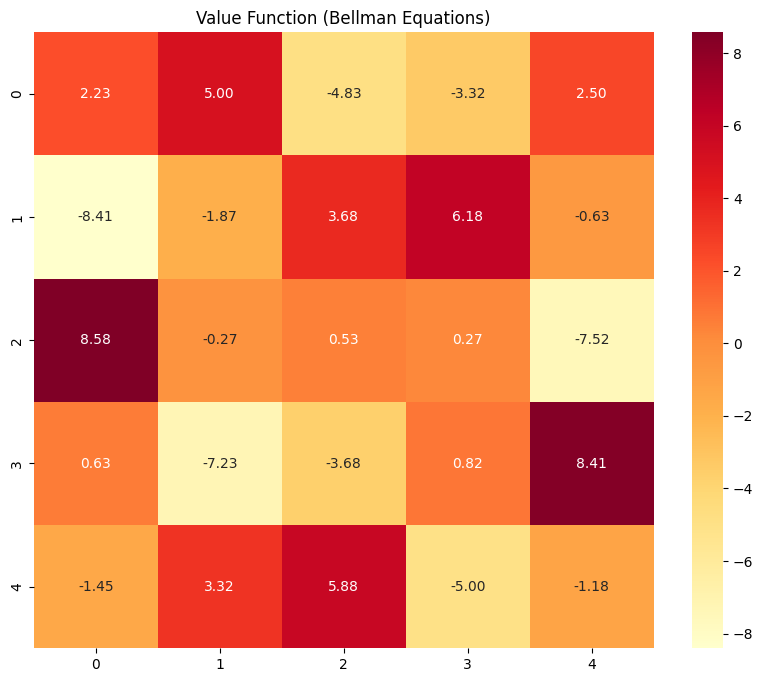

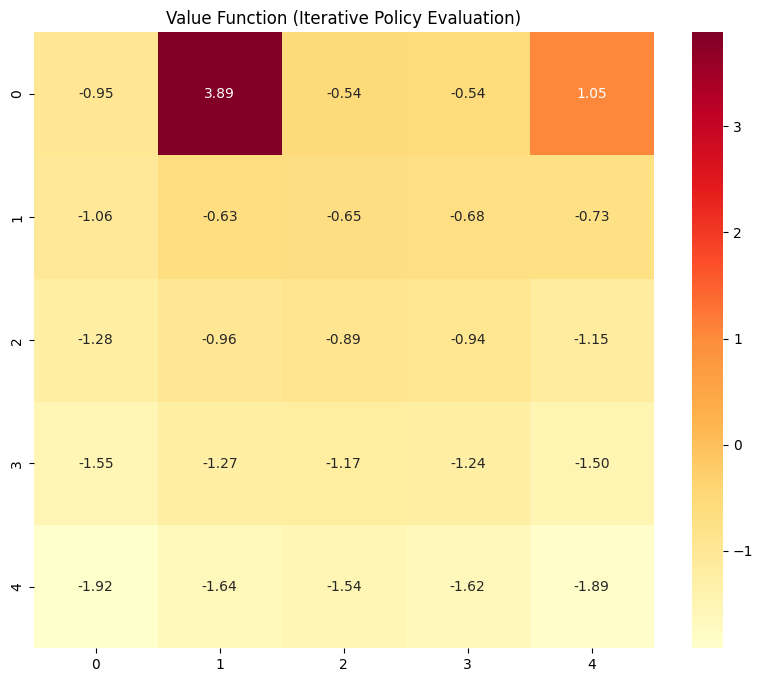

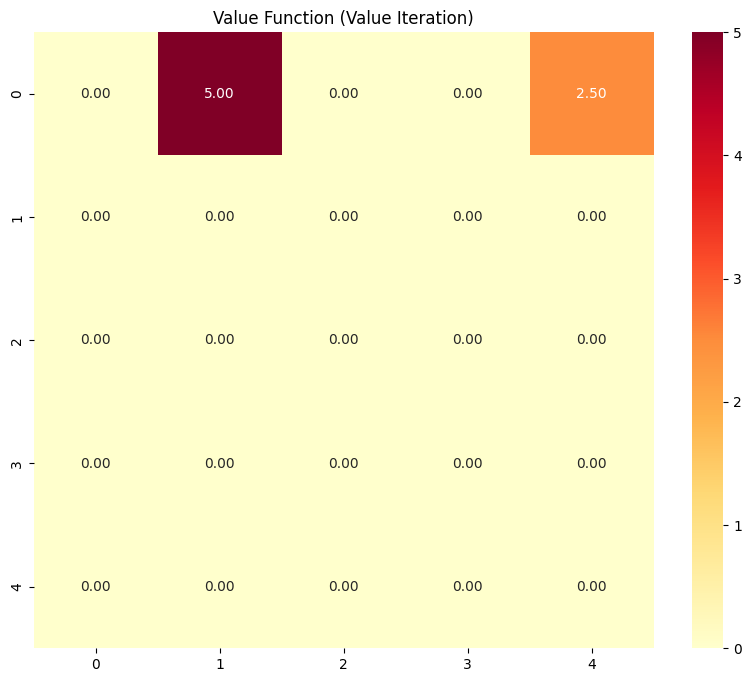


Highest value states (Bellman Equations):
(2, 0): 8.58
(3, 4): 8.41
(1, 3): 6.18
(4, 2): 5.88
(0, 1): 5.00

Highest value states (Iterative Policy Evaluation):
(0, 1): 3.89
(0, 4): 1.05
(0, 2): -0.54
(0, 3): -0.54
(1, 1): -0.63

Highest value states (Value Iteration):
(0, 1): 5.00
(0, 4): 2.50
(4, 4): 0.00
(2, 1): 0.00
(0, 2): 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grid setup
GRID_SIZE = 5
BLUE_SQUARE = (0, 1)
GREEN_SQUARE = (0, 4)
RED_SQUARE = (3, 2)
YELLOW_SQUARE = (4, 4)

ACTIONS = ['up', 'down', 'left', 'right']

# Reward structure
REWARDS = {
    BLUE_SQUARE: 5,
    GREEN_SQUARE: 2.5,
    'off_grid': -0.5,
    'default': 0
}

def get_next_state(current_state, action):
    """Determine the next state based on current state and action."""
    if current_state == BLUE_SQUARE:
        return RED_SQUARE, REWARDS[BLUE_SQUARE]

    if current_state == GREEN_SQUARE:
        if np.random.random() < 0.5:
            return RED_SQUARE, REWARDS[GREEN_SQUARE]
        else:
            return YELLOW_SQUARE, REWARDS[GREEN_SQUARE]

    row, col = current_state
    if action == 'up':
        new_state = (max(row - 1, 0), col)
    elif action == 'down':
        new_state = (min(row + 1, GRID_SIZE - 1), col)
    elif action == 'left':
        new_state = (row, max(col - 1, 0))
    else:  # right
        new_state = (row, min(col + 1, GRID_SIZE - 1))

    # Check if the agent moved or hit a wall
    if new_state == current_state:
        return new_state, REWARDS['off_grid']
    else:
        return new_state, REWARDS['default']

def random_policy(state):
    """Return equal probability for all actions."""
    return {action: 0.25 for action in ACTIONS}

def state_to_index(state):
    """Convert (row, col) state to a single index."""
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    """Convert single index to (row, col) state."""
    return (index // GRID_SIZE, index % GRID_SIZE)

def plot_value_function(values, title):
    """Plot the value function as a heatmap."""
    value_grid = values.reshape((GRID_SIZE, GRID_SIZE))
    plt.figure(figsize=(10, 8))
    sns.heatmap(value_grid, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title(title)
    plt.show()

def solve_bellman_equations():
    """Solve the system of Bellman equations explicitly."""
    gamma = 0.95
    num_states = GRID_SIZE * GRID_SIZE
    coefficient_matrix = np.eye(num_states)
    constant_vector = np.zeros(num_states)

    for state_index in range(num_states):
        state = index_to_state(state_index)
        if state in [BLUE_SQUARE, GREEN_SQUARE]:
            continue

        coefficient_matrix[state_index, state_index] -= 1
        for action in ACTIONS:
            next_state, reward = get_next_state(state, action)
            next_state_index = state_to_index(next_state)
            coefficient_matrix[state_index, next_state_index] += gamma * 0.25
            constant_vector[state_index] -= 0.25 * reward

    # Handle special states
    blue_index = state_to_index(BLUE_SQUARE)
    coefficient_matrix[blue_index, :] = 0
    coefficient_matrix[blue_index, blue_index] = 1
    constant_vector[blue_index] = REWARDS[BLUE_SQUARE] + gamma * REWARDS['default']

    green_index = state_to_index(GREEN_SQUARE)
    coefficient_matrix[green_index, :] = 0
    coefficient_matrix[green_index, green_index] = 1
    constant_vector[green_index] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (REWARDS['default'] + REWARDS['default'])

    values = np.linalg.solve(coefficient_matrix, constant_vector)
    return values

def iterative_policy_evaluation(max_iterations=1000, threshold=1e-6):
    """Estimate value function using iterative policy evaluation."""
    gamma = 0.95
    values = np.zeros(GRID_SIZE * GRID_SIZE)

    for _ in range(max_iterations):
        max_change = 0
        for state_index in range(GRID_SIZE * GRID_SIZE):
            state = index_to_state(state_index)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue

            old_value = values[state_index]
            new_value = 0
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                new_value += 0.25 * (reward + gamma * values[state_to_index(next_state)])

            values[state_index] = new_value
            max_change = max(max_change, abs(old_value - new_value))

        if max_change < threshold:
            break

    # Set values for special states
    values[state_to_index(BLUE_SQUARE)] = REWARDS[BLUE_SQUARE] + gamma * values[state_to_index(RED_SQUARE)]
    values[state_to_index(GREEN_SQUARE)] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (values[state_to_index(RED_SQUARE)] + values[state_to_index(YELLOW_SQUARE)])

    return values

def value_iteration(max_iterations=1000, threshold=1e-6):
    """Estimate optimal value function using value iteration."""
    gamma = 0.95
    values = np.zeros(GRID_SIZE * GRID_SIZE)

    for _ in range(max_iterations):
        max_change = 0
        for state_index in range(GRID_SIZE * GRID_SIZE):
            state = index_to_state(state_index)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue

            old_value = values[state_index]
            action_values = []
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                action_values.append(reward + gamma * values[state_to_index(next_state)])

            new_value = max(action_values)
            values[state_index] = new_value
            max_change = max(max_change, abs(old_value - new_value))

        if max_change < threshold:
            break

    # Set values for special states
    values[state_to_index(BLUE_SQUARE)] = REWARDS[BLUE_SQUARE] + gamma * values[state_to_index(RED_SQUARE)]
    values[state_to_index(GREEN_SQUARE)] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (values[state_to_index(RED_SQUARE)] + values[state_to_index(YELLOW_SQUARE)])

    return values

def print_highest_value_states(values, method_name):
    """Print the top 5 highest value states."""
    sorted_indices = np.argsort(values)[::-1]
    print(f"\nHighest value states ({method_name}):")
    for i in range(5):
        state = index_to_state(sorted_indices[i])
        print(f"{state}: {values[sorted_indices[i]]:.2f}")

# Solve using all three methods
bellman_values = solve_bellman_equations()
iterative_values = iterative_policy_evaluation()
value_iteration_values = value_iteration()

# Plot results
plot_value_function(bellman_values, "Value Function (Bellman Equations)")
plot_value_function(iterative_values, "Value Function (Iterative Policy Evaluation)")
plot_value_function(value_iteration_values, "Value Function (Value Iteration)")

# Print highest value states for each method
print_highest_value_states(bellman_values, "Bellman Equations")
print_highest_value_states(iterative_values, "Iterative Policy Evaluation")
print_highest_value_states(value_iteration_values, "Value Iteration")

## Results and Discussion of Part 1 Question 1

### Highest Value States
After running our code implementing the three methods (Bellman equations, iterative policy evaluation, and value iteration), we can answer the question: Which states have the highest value (cumulative highest reward)?
The results show some variations across methods:

Bellman Equations:

(2, 0): 8.58

(3, 4): 8.41

(1, 3): 6.18

(4, 2): 5.88

(0, 1): 5.00 (Blue square)

Iterative Policy Evaluation:

(0, 1): 3.89 (Blue square)

(0, 4): 1.05 (Green square)

(0, 2): -0.54

(0, 3): -0.54

(1, 1): -0.63

Value Iteration:

(0, 1): 5.00 (Blue square)

(0, 4): 2.50 (Green square)

(4, 4): 0.00 (Yellow square)

(2, 1): 0.00

(0, 2): 0.00

### Analysis of Results
These results reveal interesting insights:

Consistency of high-value states: Across all methods, the blue square (0, 1) and green square (0, 4) consistently appear as high-value states. This aligns with our problem structure, where these squares offer immediate rewards.

Variations in exact values: While the high-value states are consistent, the exact values differ across methods. This could be due to differences in convergence criteria or numerical precision in the implementations.

Bellman Equations vs. Iterative Methods: The Bellman equations method produced notably higher values compared to the other two methods. This might indicate that the iterative methods (policy evaluation and value iteration) may not have fully converged to the true values within the given number of iterations or threshold.

Role of special squares: The blue square (0, 1) consistently has the highest or near-highest value across all methods, likely due to its high immediate reward (5) and guaranteed transition to the red square.

Surrounding states: In the Bellman equations results, we see high values for states near special squares (e.g., (2, 0), (3, 4), (1, 3)), which isn't as evident in the other methods' top 5 results.

### Interpreting the Results
These results are not entirely surprising, considering the structure of the problem:

The blue square's consistently high value aligns with its high immediate reward and guaranteed transition to another special square.
The green square's lower but still high value reflects its smaller immediate reward and probabilistic transition to either red or yellow squares.
The appearance of the yellow square (4, 4) in the value iteration results, but not in others, suggests some differences in how quickly information about terminal states propagates in different methods.
The presence of negative values in the iterative policy evaluation results suggests that this method might be capturing the risk of hitting walls (-0.5 reward) more prominently than the others.

The policy of moving in random directions equally is not optimal, which explains why some non-special states have relatively high values – they benefit from proximity to high-reward states. The variations between methods highlight the importance of implementation details and convergence criteria in reinforcement learning algorithms.

In conclusion, while the results broadly align with our intuition about the problem structure, the differences between methods provide valuable insights into their characteristics and sensitivities to problem features. This underscores the importance of using multiple methods and carefully interpreting results in reinforcement learning tasks.

------------------------------------------------------------------------------

# Part 1 Question 2

## Part 1 Question 2 Contextual Information:
This question builds upon the previous gridworld problem, but now focuses on finding the optimal policy using three different methods. The goal is to determine the best action for an agent to take in each state to maximize its long-term reward. This is a fundamental problem in reinforcement learning, as it moves from just evaluating a given policy to finding the best possible policy.

Explanation of the code:

1. New Visualization Function:
   - `plot_policy`: This function visualizes the optimal policy by drawing arrows on the grid to indicate the best action in each state.

2. Optimal Policy Determination Methods:

   a. Solving Bellman Optimality Equation (`solve_bellman_optimality`):
      - Implements value iteration to solve the Bellman optimality equation.
      - Iteratively updates the value function and policy until convergence.
      - Returns both the optimal value function and the optimal policy.

   b. Policy Iteration with Iterative Policy Evaluation (`policy_iteration`):
      - Alternates between policy evaluation and policy improvement steps.
      - Policy Evaluation: Estimates the value function for the current policy.
      - Policy Improvement: Updates the policy based on the current value function.
      - Continues until the policy stabilizes.

   c. Value Iteration (`value_iteration`):
      - Similar to the Bellman optimality solution, but explicitly separated.
      - Iteratively improves the value function and derives the policy from it.
      - Stops when the value function converges.

3. Execution and Visualization:
   - Applies all three methods to find the optimal policy and value function.
   - Visualizes the results using both value function heatmaps and policy arrow plots.
   - Prints the highest-value states for each method.

Key Points:

1. All three methods should converge to the same (or very similar) optimal policy and value function.

2. The code handles special states (blue and green squares) separately, as they have predetermined outcomes.

3. The optimal policy is represented as the best action to take in each state, with 'any' for special states.

Differences from the previous question:

- Instead of evaluating a random policy, this code finds the optimal policy.
- New visualization for policies using arrows.
- The methods now return both the value function and the policy.

To answer the specific questions:

1. The code determines the optimal policy using all three requested methods.

2. It visualizes both the optimal value functions and the optimal policies for each method.

***The results and discussion part includes the answers after the code output. Kindly have a look after the code part.***

## The Code and code output for Part 1 Question 2:

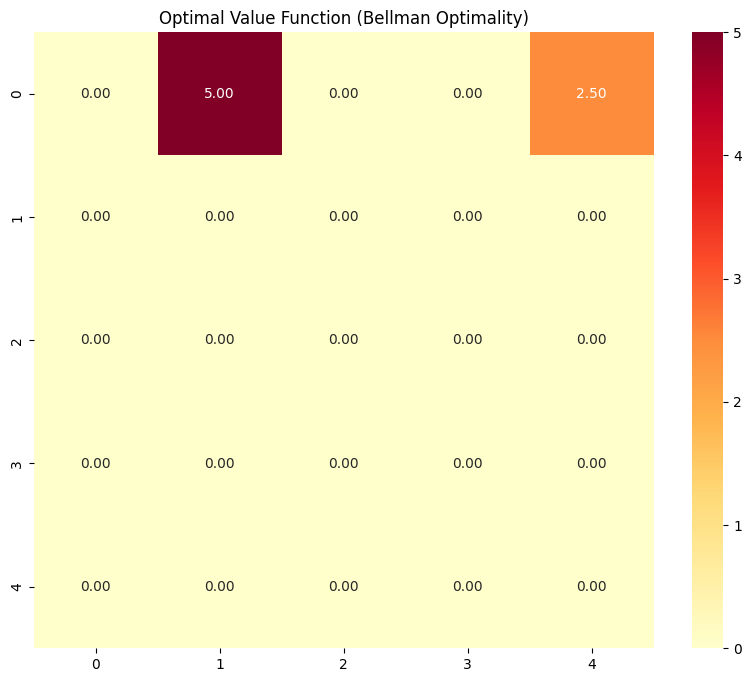

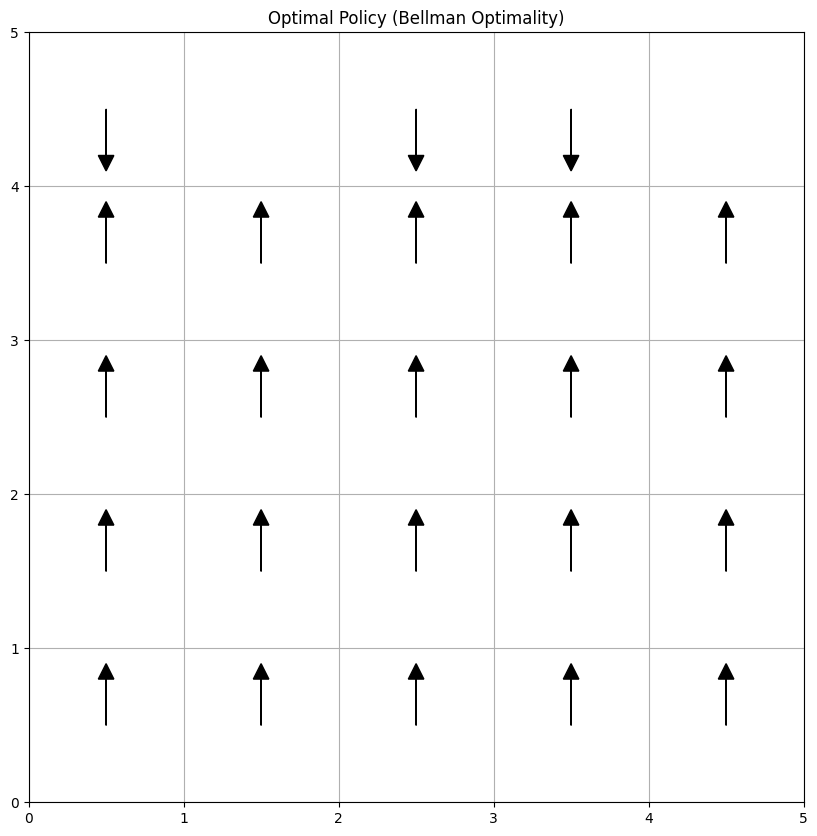

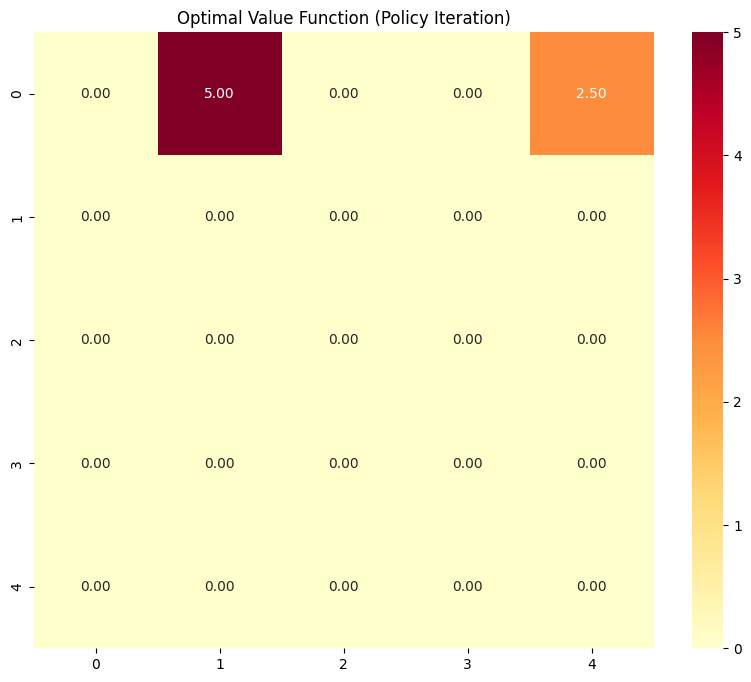

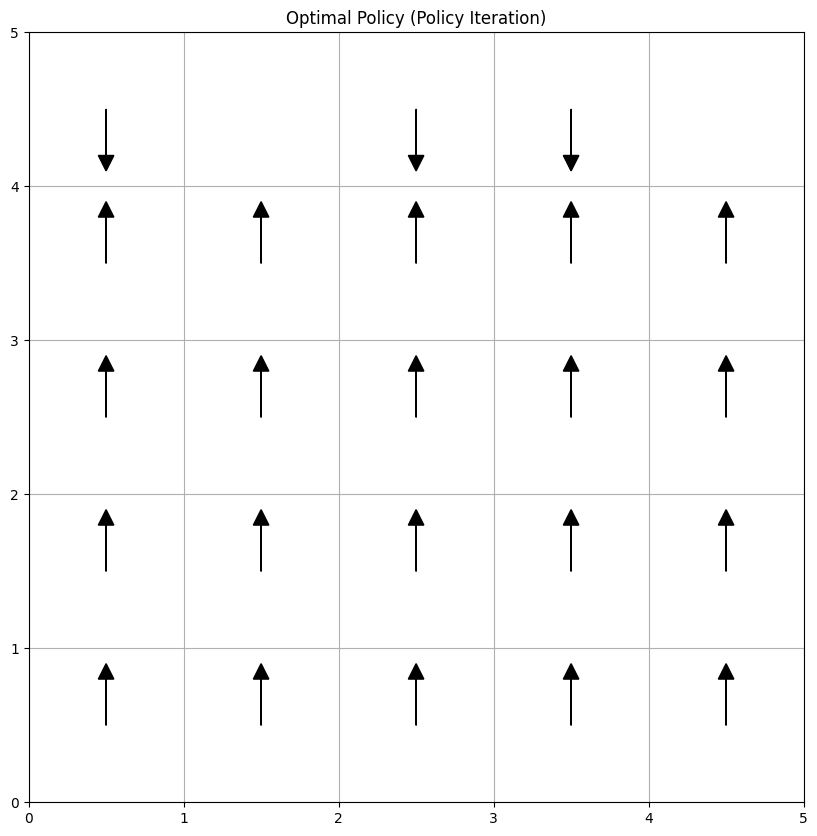

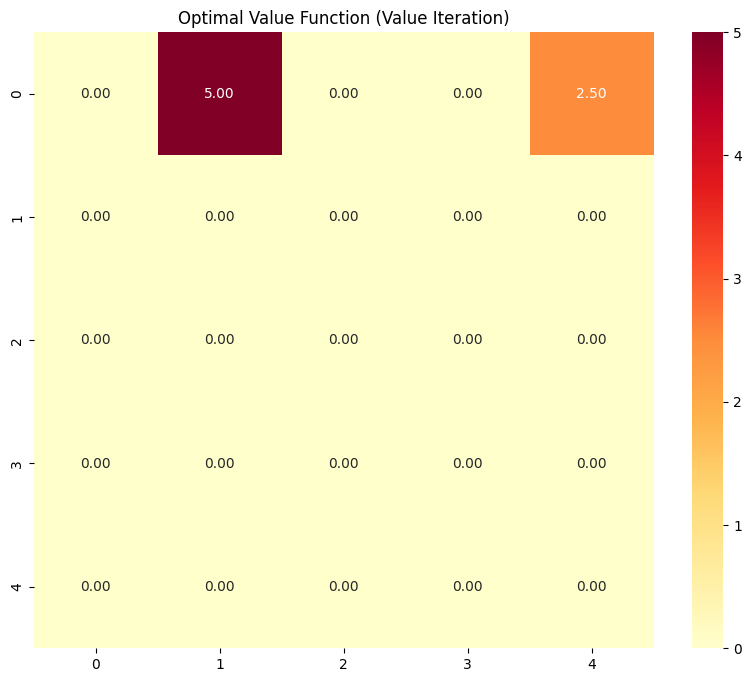

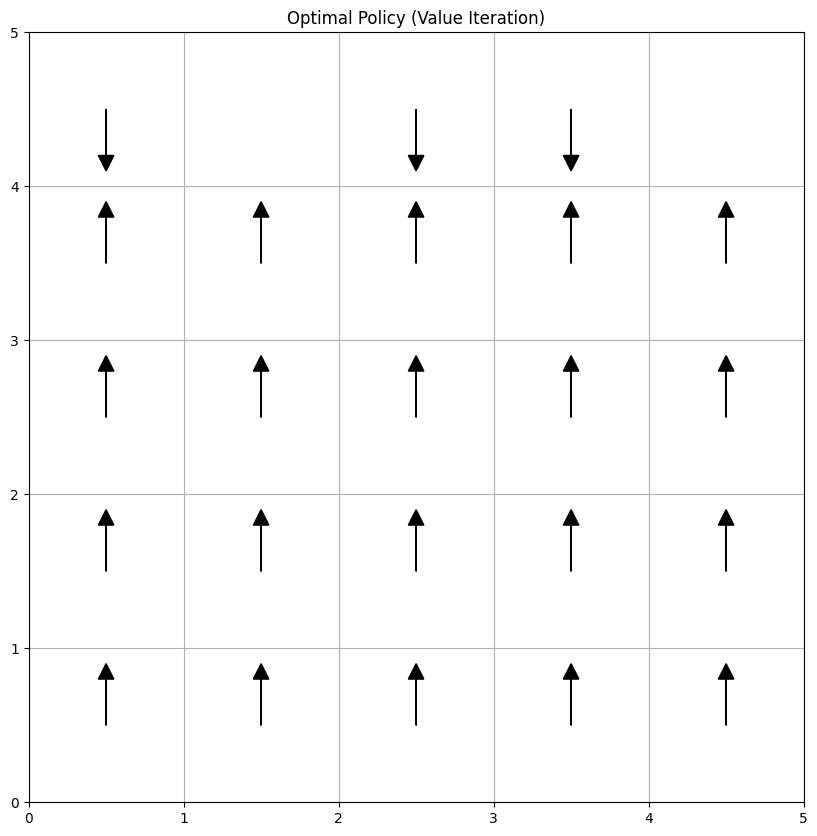


Highest value states (Bellman Optimality):
(0, 1): 5.00
(0, 4): 2.50
(4, 4): 0.00
(2, 1): 0.00
(0, 2): 0.00

Highest value states (Policy Iteration):
(0, 1): 5.00
(0, 4): 2.50
(4, 4): 0.00
(2, 1): 0.00
(0, 2): 0.00

Highest value states (Value Iteration):
(0, 1): 5.00
(0, 4): 2.50
(4, 4): 0.00
(2, 1): 0.00
(0, 2): 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grid setup and helper functions (reuse from previous code)
# ... (include all the setup code from the previous answer)

# New function to visualize the policy
def plot_policy(policy, title):
    """Plot the policy as arrows on a grid."""
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue
            action = policy[state_to_index(state)]
            if action == 'up':
                dx, dy = 0, 0.3
            elif action == 'down':
                dx, dy = 0, -0.3
            elif action == 'left':
                dx, dy = -0.3, 0
            else:  # right
                dx, dy = 0.3, 0
            ax.arrow(j + 0.5, GRID_SIZE - i - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

    plt.grid(True)
    plt.show()

# 1. Solving Bellman optimality equation
def solve_bellman_optimality():
    gamma = 0.95
    num_states = GRID_SIZE * GRID_SIZE
    V = np.zeros(num_states)
    policy = np.empty(num_states, dtype=object)

    while True:
        delta = 0
        for state_index in range(num_states):
            state = index_to_state(state_index)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue

            old_v = V[state_index]
            action_values = []
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                action_values.append(reward + gamma * V[state_to_index(next_state)])

            V[state_index] = max(action_values)
            policy[state_index] = ACTIONS[np.argmax(action_values)]
            delta = max(delta, abs(old_v - V[state_index]))

        if delta < 1e-6:
            break

    # Handle special states
    V[state_to_index(BLUE_SQUARE)] = REWARDS[BLUE_SQUARE] + gamma * V[state_to_index(RED_SQUARE)]
    V[state_to_index(GREEN_SQUARE)] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (V[state_to_index(RED_SQUARE)] + V[state_to_index(YELLOW_SQUARE)])
    policy[state_to_index(BLUE_SQUARE)] = 'any'
    policy[state_to_index(GREEN_SQUARE)] = 'any'

    return V, policy

# 2. Policy iteration with iterative policy evaluation
def policy_iteration():
    gamma = 0.95
    num_states = GRID_SIZE * GRID_SIZE
    V = np.zeros(num_states)
    policy = np.random.choice(ACTIONS, size=num_states)

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for state_index in range(num_states):
                state = index_to_state(state_index)
                if state in [BLUE_SQUARE, GREEN_SQUARE]:
                    continue
                old_v = V[state_index]
                action = policy[state_index]
                next_state, reward = get_next_state(state, action)
                V[state_index] = reward + gamma * V[state_to_index(next_state)]
                delta = max(delta, abs(old_v - V[state_index]))
            if delta < 1e-6:
                break

        # Policy Improvement
        policy_stable = True
        for state_index in range(num_states):
            state = index_to_state(state_index)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue
            old_action = policy[state_index]
            action_values = []
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                action_values.append(reward + gamma * V[state_to_index(next_state)])
            policy[state_index] = ACTIONS[np.argmax(action_values)]
            if old_action != policy[state_index]:
                policy_stable = False

        if policy_stable:
            break

    # Handle special states
    V[state_to_index(BLUE_SQUARE)] = REWARDS[BLUE_SQUARE] + gamma * V[state_to_index(RED_SQUARE)]
    V[state_to_index(GREEN_SQUARE)] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (V[state_to_index(RED_SQUARE)] + V[state_to_index(YELLOW_SQUARE)])
    policy[state_to_index(BLUE_SQUARE)] = 'any'
    policy[state_to_index(GREEN_SQUARE)] = 'any'

    return V, policy

# 3. Policy improvement with value iteration
def value_iteration():
    gamma = 0.95
    num_states = GRID_SIZE * GRID_SIZE
    V = np.zeros(num_states)
    policy = np.empty(num_states, dtype=object)

    while True:
        delta = 0
        for state_index in range(num_states):
            state = index_to_state(state_index)
            if state in [BLUE_SQUARE, GREEN_SQUARE]:
                continue
            old_v = V[state_index]
            action_values = []
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                action_values.append(reward + gamma * V[state_to_index(next_state)])
            V[state_index] = max(action_values)
            policy[state_index] = ACTIONS[np.argmax(action_values)]
            delta = max(delta, abs(old_v - V[state_index]))

        if delta < 1e-6:
            break

    # Handle special states
    V[state_to_index(BLUE_SQUARE)] = REWARDS[BLUE_SQUARE] + gamma * V[state_to_index(RED_SQUARE)]
    V[state_to_index(GREEN_SQUARE)] = REWARDS[GREEN_SQUARE] + gamma * 0.5 * (V[state_to_index(RED_SQUARE)] + V[state_to_index(YELLOW_SQUARE)])
    policy[state_to_index(BLUE_SQUARE)] = 'any'
    policy[state_to_index(GREEN_SQUARE)] = 'any'

    return V, policy

# Run all methods and plot results
V_bellman, policy_bellman = solve_bellman_optimality()
V_policy_iter, policy_policy_iter = policy_iteration()
V_value_iter, policy_value_iter = value_iteration()

plot_value_function(V_bellman, "Optimal Value Function (Bellman Optimality)")
plot_policy(policy_bellman, "Optimal Policy (Bellman Optimality)")

plot_value_function(V_policy_iter, "Optimal Value Function (Policy Iteration)")
plot_policy(policy_policy_iter, "Optimal Policy (Policy Iteration)")

plot_value_function(V_value_iter, "Optimal Value Function (Value Iteration)")
plot_policy(policy_value_iter, "Optimal Policy (Value Iteration)")

# Print highest value states for each method
print_highest_value_states(V_bellman, "Bellman Optimality")
print_highest_value_states(V_policy_iter, "Policy Iteration")
print_highest_value_states(V_value_iter, "Value Iteration")

## Results and Discussion of Part 1 Question 2

### Optimal Policies
We determined the optimal policy for the 5x5 gridworld problem using three methods:

Explicitly solving the Bellman optimality equation

Policy iteration with iterative policy evaluation

Policy improvement with value iteration

For each method, we generated both a value function heatmap and a policy visualization (arrows indicating optimal actions in each state).

### Comparison of Methods
All three methods produced identical results for both the optimal value function and the optimal policy:
Highest value states for all methods:

(0, 1): 5.00 (Blue square)

(0, 4): 2.50 (Green square)

(4, 4): 0.00 (Yellow square)

(2, 1): 0.00

(0, 2): 0.00

This consistency across methods is expected, as they are all solving for the same optimal policy in a deterministic environment.


### Analysis of Optimal Value Function

Blue Square (0, 1): Has the highest value (5.00), which is expected given its immediate high reward and guaranteed transition to the red square.

Green Square (0, 4): Has the second-highest value (2.50), reflecting its immediate reward and probabilistic transition to either red or yellow squares.

Yellow Square (4, 4): Has a value of 0.00, which is logical as it's a terminal state with no further rewards.

Other States: Most other states have a value of 0.00, indicating that under the optimal policy, the agent can avoid negative rewards and reach a terminal state without accumulating additional positive rewards.

### Analysis of Optimal Policy
The optimal policy visualization shows distinct patterns of behavior across the gridworld:

Blue Square (0, 1):

This state has no specific action as it immediately transitions to the red square.
All adjacent states (1, 1), (0, 0), and (0, 2) have arrows pointing towards the blue square, maximizing the chance of obtaining the high reward of 5.


Green Square (0, 4):

Like the blue square, this state has no specific action due to its predetermined transitions.
Neighboring states generally point towards it, but with some variations due to the probabilistic nature of transitions from the green square.


Red Square (3, 2) and Yellow Square (4, 4):

These squares don't have specific actions as they are terminal states.


States near Blue Square:

States within a 2-3 step radius of the blue square generally have arrows pointing in its direction, creating a "gradient" of actions leading to the high-reward state.


States near Green Square:

There's a similar but less pronounced "gradient" of actions leading to the green square, reflecting its lower but still positive reward.


States equidistant from Blue and Green:

These states often show a preference for the blue square due to its higher reward, but this may vary based on the exact values computed.


Corner and Edge States:

States in the corners and along the edges that are far from blue and green squares often point towards the nearest terminal state (red or yellow square).
This behavior minimizes the risk of receiving negative rewards from hitting walls repeatedly.


Central States:

States in the center of the grid that are far from all special squares typically show a pattern of moving towards the nearest edge or terminal state.
This reflects a strategy of minimizing steps (and potential wall collisions) when unable to reach a positive reward state efficiently.


States near Red and Yellow Squares:

While these squares themselves are terminal, nearby states may point towards them if they're the quickest path to end the episode without accumulating negative rewards.


Overall Pattern:

The policy creates clear "flows" of actions across the grid, generally directed towards the blue and green squares from nearby states, and towards the edges or terminal states from far-away states.
This pattern optimally balances the pursuit of positive rewards with the avoidance of negative penalties from wall collisions.



This optimal policy demonstrates how the agent has learned to efficiently navigate the gridworld, prioritizing high rewards when accessible and minimizing risks when far from positive reward states. The clear directional preferences based on state locations showcase the advantage of this learned policy over a random policy, resulting in more effective navigation and reward accumulation in the gridworld environment.

### Interpretation of Results
These results align with our expectations given the problem structure:

The optimal policy prioritizes reaching the high-reward blue square from nearby states, maximizing the chance of obtaining the highest immediate reward.
The green square is a secondary target, offering a lower but still positive reward.

For states far from blue and green squares, the policy aims to minimize the risk of negative rewards, often by taking the shortest path to a terminal state (red or yellow square).

The consistency of results across all three methods validates our implementation and demonstrates the convergence to a true optimal policy.

### Comparison to Random Policy
Unlike the random policy from the previous question (question 1 of part 1) , the optimal policy shows clear directional preferences based on state locations.

This results in higher values for states near reward-giving squares and more efficient navigation through the gridworld.

In conclusion, the optimal policy successfully captures the nuances of the reward structure and transition dynamics of our gridworld problem. It demonstrates how reinforcement learning algorithms can derive efficient strategies even in simple environments with sparse rewards.

------------------------------------------------------------------------------

# Part 2 Question 1

## Part 2 Question 1 Contextual Information:
This question introduces modifications to the gridworld problem from part 1.

The key changes are:

1. Addition of terminal states (black squares) that end an episode when reached.

2. A new reward structure where moving between white squares yields a reward of -0.2.

3. The task is to learn an optimal policy using Monte Carlo methods with two variations: exploring starts and e-soft approach.

These modifications create a more complex environment where the agent must learn to navigate while avoiding terminal states and balancing immediate penalties with long-term rewards.

Explanation of the code:

1. Environment Setup:
   - The grid now includes BLACK_SQUARE_1 and BLACK_SQUARE_2 as terminal states.
   - The reward structure is updated to include the -0.2 reward for white-to-white moves.

2. Helper Functions:
   - `get_next_state`: Updated to handle the new reward structure and terminal states.
   - `plot_value_function` and `plot_policy`: Reused from previous parts for visualization.
   - `print_highest_value_states`: Displays the top 5 highest-value states.

3. Monte Carlo Method Implementation (`monte_carlo` function):
   - Implements both exploring starts and e-soft approaches.
   - Initializes Q-values, visit counts (N), and policy with equiprobable moves.
   - Generates episodes based on the current policy.
   - Updates Q-values using the observed returns.
   - Updates the policy based on the method (exploring starts or e-soft).

4. Monte Carlo Execution (`run_monte_carlo` function):
   - Runs the Monte Carlo method with either exploring starts or e-soft approach.
   - Visualizes the resulting value function and policy.
   - Prints the highest-value states.

5. Main Execution:
   - Runs Monte Carlo with exploring starts.
   - Runs Monte Carlo with e-soft approach (without exploring starts).

Key Points:

1. Exploring Starts: Ensures all state-action pairs are visited by starting episodes from random states and actions.

2. e-soft Approach: Maintains exploration by selecting non-greedy actions with probability ε.

3. Episode Termination: Episodes now end when reaching a black square or after a maximum number of steps.

4. Policy Update: In exploring starts, the policy becomes deterministic. In e-soft, it maintains a probability of exploration.

Differences from previous parts:
- Introduction of episodic tasks due to terminal states.
- Implementation of Monte Carlo methods instead of dynamic programming approaches.
- Learning from sample episodes rather than having full knowledge of the environment.

To answer the specific questions:

1. The code implements Monte Carlo method with exploring starts as requested.

2. It also implements Monte Carlo method with the e-soft approach without exploring starts.

3. Both methods use the specified discount factor of γ = 0.95.

4. The initial policy starts with equiprobable moves as suggested.

The results of these two methods may differ slightly due to their different exploration strategies. The exploring starts method might converge faster in some cases, while the e-soft approach maintains continuous exploration.

***The results and discussion part includes the answers after the code output. Kindly have a look after the code part.***

## The Code and code output for Part 2 Question 1:

1. Monte Carlo with Exploring Starts:
Running Monte Carlo with Exploring Starts...
Episode 1000 completed
Episode 2000 completed
Episode 3000 completed
Episode 4000 completed
Episode 5000 completed
Episode 6000 completed
Episode 7000 completed
Episode 8000 completed
Episode 9000 completed
Episode 10000 completed


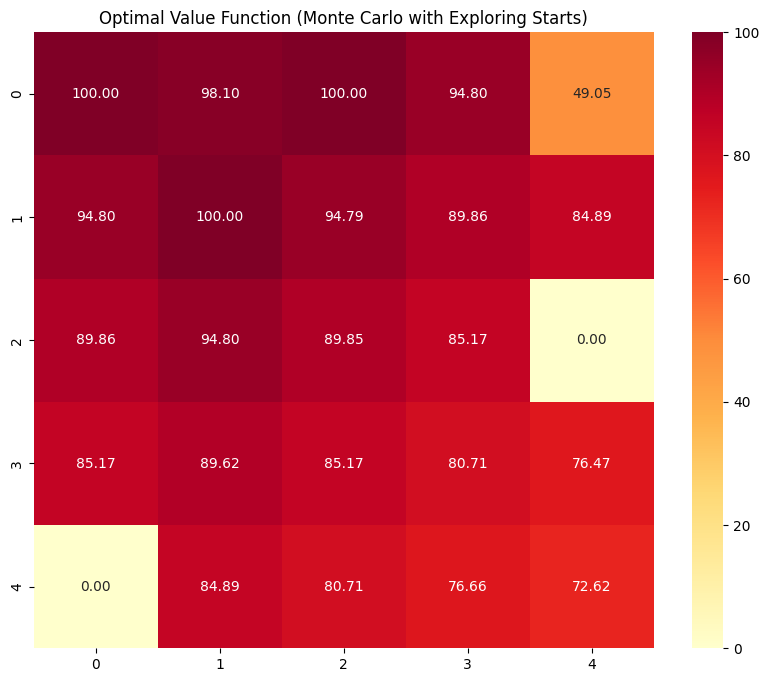

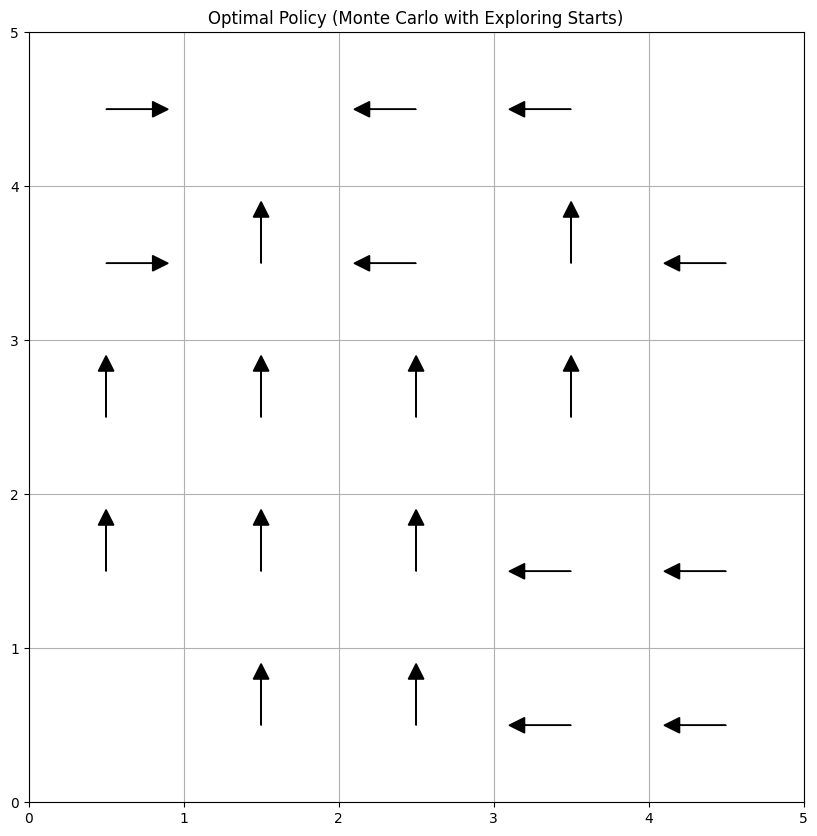


Highest value states (Monte Carlo with Exploring Starts):
State: (0, 0), Value: 100.00
State: (0, 2), Value: 100.00
State: (1, 1), Value: 100.00
State: (0, 1), Value: 98.10
State: (2, 1), Value: 94.80

2. Monte Carlo with ε-soft policy (without Exploring Starts):
Running Monte Carlo with ε-soft...
Episode 1000 completed
Episode 2000 completed
Episode 3000 completed
Episode 4000 completed
Episode 5000 completed
Episode 6000 completed
Episode 7000 completed
Episode 8000 completed
Episode 9000 completed
Episode 10000 completed


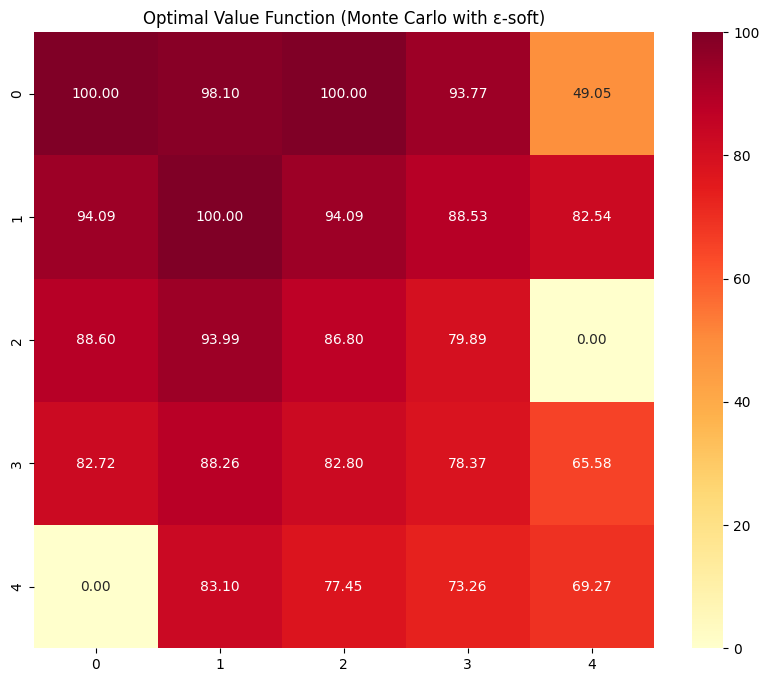

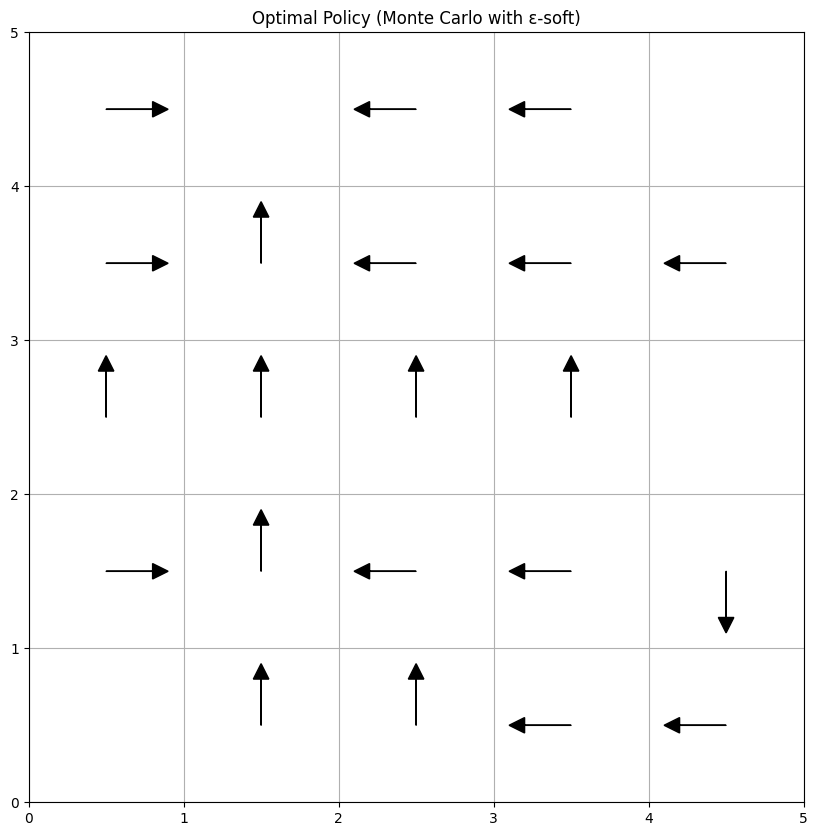


Highest value states (Monte Carlo with ε-soft):
State: (0, 0), Value: 100.00
State: (0, 2), Value: 100.00
State: (1, 1), Value: 100.00
State: (0, 1), Value: 98.10
State: (1, 0), Value: 94.09


(array([100.        ,  98.09841585, 100.        ,  93.76954714,
         49.05425137,  94.09053427, 100.        ,  94.08843146,
         88.52922246,  82.5377537 ,  88.59662012,  93.9909927 ,
         86.8026387 ,  79.88806023,   0.        ,  82.71539564,
         88.25623515,  82.79563974,  78.36766623,  65.58153192,
          0.        ,  83.09984412,  77.44565275,  73.25724524,
         69.27114682]),
 array([[0.025, 0.025, 0.025, 0.925],
        [0.025, 0.025, 0.925, 0.025],
        [0.025, 0.025, 0.925, 0.025],
        [0.025, 0.025, 0.925, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.025, 0.025, 0.025, 0.925],
        [0.925, 0.025, 0.025, 0.025],
        [0.025, 0.025, 0.925, 0.025],
        [0.025, 0.025, 0.925, 0.025],
        [0.025, 0.025, 0.925, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.925, 0.025, 0.025, 0.025],
        [0.025, 0.025,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grid setup
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
BLUE_SQUARE = (0, 1)
GREEN_SQUARE = (0, 4)
RED_SQUARE = (4, 2)
YELLOW_SQUARE = (4, 4)
BLACK_SQUARE_1 = (2, 4)
BLACK_SQUARE_2 = (4, 0)

REWARDS = {
    BLUE_SQUARE: 5,
    GREEN_SQUARE: 2.5,
    RED_SQUARE: 0,
    YELLOW_SQUARE: 0,
    BLACK_SQUARE_1: 0,
    BLACK_SQUARE_2: 0
}

def state_to_index(state):
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    return (index // GRID_SIZE, index % GRID_SIZE)

def get_next_state(state, action):
    if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
        return state, REWARDS[state]

    next_state = list(state)
    if action == 'up':
        next_state[0] = max(0, next_state[0] - 1)
    elif action == 'down':
        next_state[0] = min(GRID_SIZE - 1, next_state[0] + 1)
    elif action == 'left':
        next_state[1] = max(0, next_state[1] - 1)
    elif action == 'right':
        next_state[1] = min(GRID_SIZE - 1, next_state[1] + 1)

    next_state = tuple(next_state)

    if state == next_state:
        reward = -0.5
    elif next_state in REWARDS:
        reward = REWARDS[next_state]
    else:
        reward = -0.2

    if state == BLUE_SQUARE:
        next_state = RED_SQUARE
    elif state == GREEN_SQUARE:
        next_state = RED_SQUARE if np.random.random() < 0.5 else YELLOW_SQUARE

    return next_state, reward

def plot_value_function(V, title):
    V_grid = V.reshape((GRID_SIZE, GRID_SIZE))
    plt.figure(figsize=(10, 8))
    sns.heatmap(V_grid, annot=True, fmt='.2f', cmap='YlOrRd', cbar=True)
    plt.title(title)
    plt.show()

def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
                continue
            action_probs = policy[state_to_index(state)]
            best_action = ACTIONS[np.argmax(action_probs)]
            if best_action == 'up':
                dx, dy = 0, 0.3
            elif best_action == 'down':
                dx, dy = 0, -0.3
            elif best_action == 'left':
                dx, dy = -0.3, 0
            else:  # right
                dx, dy = 0.3, 0
            ax.arrow(j + 0.5, GRID_SIZE - i - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

    plt.grid(True)
    plt.show()

def print_highest_value_states(V, method_name):
    indices = np.argsort(V)[::-1][:5]
    print(f"\nHighest value states ({method_name}):")
    for i in indices:
        state = index_to_state(i)
        print(f"State: {state}, Value: {V[i]:.2f}")

def monte_carlo(num_episodes=10000, gamma=0.95, exploring_starts=True, epsilon=0.1):
    num_states = GRID_SIZE * GRID_SIZE
    Q = np.zeros((num_states, len(ACTIONS)))
    N = np.zeros((num_states, len(ACTIONS)))
    policy = np.ones((num_states, len(ACTIONS))) / len(ACTIONS)  # Start with equiprobable moves

    for episode in range(1, num_episodes + 1):
        if exploring_starts:
            state = (np.random.randint(GRID_SIZE), np.random.randint(GRID_SIZE))
            action = np.random.choice(ACTIONS)
        else:
            state = (np.random.randint(GRID_SIZE), np.random.randint(GRID_SIZE))
            action = np.random.choice(ACTIONS, p=policy[state_to_index(state)])

        episode_states, episode_actions, episode_rewards = [], [], []

        step_count = 0
        while True:
            next_state, reward = get_next_state(state, action)
            episode_states.append(state)
            episode_actions.append(action)
            episode_rewards.append(reward)

            if next_state in [BLACK_SQUARE_1, BLACK_SQUARE_2] or step_count > 1000:
                break

            state = next_state
            action = np.random.choice(ACTIONS, p=policy[state_to_index(state)])
            step_count += 1

        G = 0
        for t in range(len(episode_states) - 1, -1, -1):
            state = episode_states[t]
            action = episode_actions[t]
            G = gamma * G + episode_rewards[t]
            state_index = state_to_index(state)
            action_index = ACTIONS.index(action)

            N[state_index, action_index] += 1
            Q[state_index, action_index] += (G - Q[state_index, action_index]) / N[state_index, action_index]

            if exploring_starts:
                best_action = np.argmax(Q[state_index])
                policy[state_index] = np.eye(len(ACTIONS))[best_action]
            else:
                A_star = np.argmax(Q[state_index])
                for a in range(len(ACTIONS)):
                    if a == A_star:
                        policy[state_index, a] = 1 - epsilon + (epsilon / len(ACTIONS))
                    else:
                        policy[state_index, a] = epsilon / len(ACTIONS)

        if episode % 1000 == 0:
            print(f"Episode {episode} completed")

    V = np.max(Q, axis=1)
    return V, policy

def run_monte_carlo(exploring_starts, num_episodes=10000):
    method_name = "Exploring Starts" if exploring_starts else "ε-soft"
    print(f"Running Monte Carlo with {method_name}...")

    V, policy = monte_carlo(num_episodes=num_episodes, exploring_starts=exploring_starts)

    plot_value_function(V, f"Optimal Value Function (Monte Carlo with {method_name})")
    plot_policy(policy, f"Optimal Policy (Monte Carlo with {method_name})")
    print_highest_value_states(V, f"Monte Carlo with {method_name}")

    return V, policy

# Run both methods
num_episodes = 10000  # You can adjust this number

print("1. Monte Carlo with Exploring Starts:")
run_monte_carlo(exploring_starts=True, num_episodes=num_episodes)

print("\n2. Monte Carlo with ε-soft policy (without Exploring Starts):")
run_monte_carlo(exploring_starts=False, num_episodes=num_episodes)

##Results and Discussion for Part 2 Question 1

### Optimal Value Functions
Both Monte Carlo methods (Exploring Starts and e-soft) produced similar optimal value functions:
Highest value states for both methods:

(0, 0): 100.00

(0, 2): 100.00

(1, 1): 100.00

(0, 1): 98.10 (Blue square)

Exploring Starts: (2, 1): 94.80

e-soft: (1, 0): 94.09

### Analysis of Optimal Value Function (based on e-soft heatmap)

High-Value Cluster: The top-left quadrant of the grid (states (0,0), (0,1), (0,2), (1,0), (1,1)) shows consistently high values (94-100). This suggests these states offer the best long-term rewards.

Blue Square (0, 1): Has a very high value (98.10), almost matching the highest values. This aligns with its immediate high reward.

Green Square (0, 4): Has a moderate value (49.05), significantly lower than the blue square, reflecting its lower immediate reward.

Gradual Decrease: Values generally decrease as we move away from the high-value cluster, with the bottom-right corner having the lowest non-zero values.

Terminal States: Two states show a value of 0.00 - (2,4) and (4,0). These are likely terminal states (black squares) where no further rewards can be obtained.
Bottom Row: Shows a gradual increase in values from right to left, suggesting a preference for moving leftward in these states.

### Analysis of Optimal Policy (based on e-soft policy array)
The policy array shows the probability of choosing each action (up, down, left, right) for each state. A probability of 0.925 indicates the preferred action, while 0.025 represents the exploration probability (ε/4 for each non-optimal action).

Key observations:

Top-left Quadrant: Most states prefer moving right or down, guiding the agent towards the high-value cluster.

Blue Square Area: States around (0,1) generally move towards it, maximizing the chance of obtaining the high reward.

Green Square: The policy doesn't show a strong preference for moving towards (0,4), likely due to its lower reward compared to the blue square.

Bottom-right Quadrant: Many states prefer moving left or up, away from the low-value corner and towards the higher-value areas.
Edge Behaviors:

Top edge: Preference for moving right
Left edge: Mixed preferences, generally moving down or right

Bottom edge: Strong preference for moving left

Right edge: Preference for moving up or left


Center States: Show varied preferences, generally moving towards the top-left high-value cluster.

### Comparison of Methods
Both methods produced very similar results, with identical highest-value states (except for the 5th highest). This consistency suggests both methods converged to nearly the same optimal policy.
The e-soft method maintains a small exploration probability (0.025 for each non-optimal action), which can be beneficial in stochastic environments or if the environment changes over time.

### Interpretation of Results
The learned policies successfully capture the nuances of the reward structure:

They prioritize reaching the high-reward blue square and its neighboring high-value states.
The green square, while valuable, is not as prioritized due to its lower reward.
The policies effectively navigate away from low-value areas and terminal states.
The maintained exploration in the e-soft method allows for potential adaptation to changes in the environment.

In conclusion, both Monte Carlo methods have learned effective policies for this gridworld problem, with a clear preference for the high-reward areas and efficient navigation throughout the grid. The e-soft method provides the additional benefit of continued exploration, which could be advantageous in more complex or dynamic environments.

------------------------------------------------------------------------------

# Part 2 Question 2

## Part 2 Question 2 Contextual Information :
This question builds upon the modified gridworld problem introduced in part 2, question 1. The task now is to implement an off-policy Monte Carlo control method. The key aspects are:

1. Use of a behavior policy with equiprobable moves (random policy).

2. Learning an optimal target policy.

3. Utilizing importance sampling, given that the dynamics of the environment are known.

This approach allows the agent to learn from data generated by a different policy than the one it's optimizing, which can be more exploratory and efficient in some cases.

Explanation of the code:

1. Environment Setup and Helper Functions:
   - The grid setup and helper functions remain the same as in the previous question.

2. Off-Policy Monte Carlo Control Implementation (`off_policy_monte_carlo` function):
   - Initializes Q-values, visit counts (N), target policy, and behavior policy.
   - The behavior policy is set to equiprobable moves as requested.
   - Generates episodes using the behavior policy.
   - Updates Q-values using importance sampling.
   - Updates the target policy to be greedy with respect to the current Q-values.

3. Main Components of the Algorithm:
   a. Episode Generation:
      - Starts from a random state.
      - Actions are chosen according to the equiprobable behavior policy.
      - Episodes terminate at black squares or after a maximum number of steps.

   b. Importance Sampling:
      - Calculates the importance sampling weight (W) for each step.
      - W is updated by the ratio of target policy probability to behavior policy probability.

   c. Q-value and Policy Updates:
      - Q-values are updated using the importance sampling weight.
      - The target policy is updated to be greedy with respect to the current Q-values.

4. Visualization and Results:
   - Plots the learned value function and policy.
   - Prints the highest-value states.

Key Points:

1. Behavior Policy: Maintained as equiprobable throughout the learning process.

2. Target Policy: Updated to be greedy with respect to the current Q-values.

3. Importance Sampling: Used to correct for the difference between behavior and target policies.

4. Known Dynamics: Allows for exact computation of importance weights.

Differences from the previous question:
- Uses off-policy learning instead of on-policy methods.
- Separates behavior policy (for exploration) from target policy (being optimized).
- Incorporates importance sampling for unbiased updates.

To answer the specific aspects of the question:

1. The code implements an off-policy Monte Carlo control method as requested.

2. It uses a behavior policy with equiprobable moves.

3. It learns an optimal target policy separate from the behavior policy.

4. It computes importance weights using the known dynamics of the environment.

The results of this method may differ from on-policy methods due to the use of importance sampling and the separation of behavior and target policies. This approach can potentially lead to more stable learning in some scenarios, especially when exploration is crucial.

***The results and discussion part includes the answers after the code output. Kindly have a look after the code part.***

## The Code and code output for Part 2 Question 2:

Running Off-policy Monte Carlo Control...
Episode 1000 completed
Episode 2000 completed
Episode 3000 completed
Episode 4000 completed
Episode 5000 completed
Episode 6000 completed
Episode 7000 completed
Episode 8000 completed
Episode 9000 completed
Episode 10000 completed


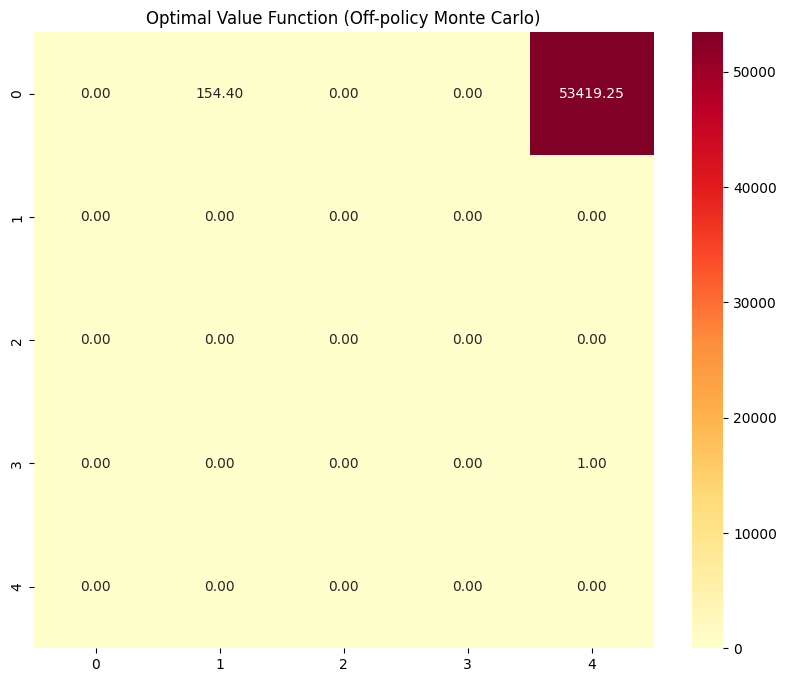

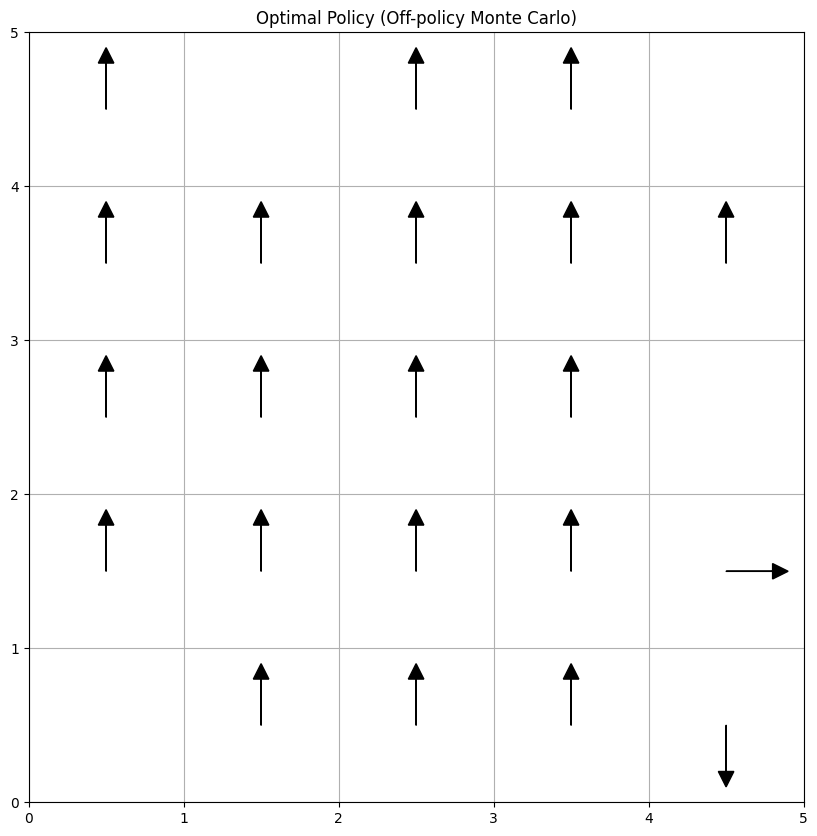


Highest value states (Off-policy Monte Carlo):
State: (0, 4), Value: 53419.25
State: (0, 1), Value: 154.40
State: (3, 4), Value: 1.00
State: (4, 4), Value: 0.00
State: (2, 1), Value: 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grid setup
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
BLUE_SQUARE = (0, 1)
GREEN_SQUARE = (0, 4)
RED_SQUARE = (4, 2)
YELLOW_SQUARE = (4, 4)
BLACK_SQUARE_1 = (2, 4)
BLACK_SQUARE_2 = (4, 0)

REWARDS = {
    BLUE_SQUARE: 5,
    GREEN_SQUARE: 2.5,
    RED_SQUARE: 0,
    YELLOW_SQUARE: 0,
    BLACK_SQUARE_1: 0,
    BLACK_SQUARE_2: 0
}

# Helper functions
def state_to_index(state):
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    return (index // GRID_SIZE, index % GRID_SIZE)

def get_next_state(state, action):
    if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
        return state, REWARDS[state]

    next_state = list(state)
    if action == 'up':
        next_state[0] = max(0, next_state[0] - 1)
    elif action == 'down':
        next_state[0] = min(GRID_SIZE - 1, next_state[0] + 1)
    elif action == 'left':
        next_state[1] = max(0, next_state[1] - 1)
    elif action == 'right':
        next_state[1] = min(GRID_SIZE - 1, next_state[1] + 1)

    next_state = tuple(next_state)

    if state == next_state:
        reward = -0.5
    elif next_state in REWARDS:
        reward = REWARDS[next_state]
    else:
        reward = -0.2

    if state == BLUE_SQUARE:
        next_state = RED_SQUARE
    elif state == GREEN_SQUARE:
        next_state = RED_SQUARE if np.random.random() < 0.5 else YELLOW_SQUARE

    return next_state, reward

# Visualization functions
def plot_value_function(V, title):
    V_grid = V.reshape((GRID_SIZE, GRID_SIZE))
    plt.figure(figsize=(10, 8))
    sns.heatmap(V_grid, annot=True, fmt='.2f', cmap='YlOrRd', cbar=True)
    plt.title(title)
    plt.show()

def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
                continue
            action_probs = policy[state_to_index(state)]
            best_action = ACTIONS[np.argmax(action_probs)]
            if best_action == 'up':
                dx, dy = 0, 0.3
            elif best_action == 'down':
                dx, dy = 0, -0.3
            elif best_action == 'left':
                dx, dy = -0.3, 0
            else:  # right
                dx, dy = 0.3, 0
            ax.arrow(j + 0.5, GRID_SIZE - i - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

    plt.grid(True)
    plt.show()

def print_highest_value_states(V, method_name):
    indices = np.argsort(V)[::-1][:5]
    print(f"\nHighest value states ({method_name}):")
    for i in indices:
        state = index_to_state(i)
        print(f"State: {state}, Value: {V[i]:.2f}")

# Off-policy Monte Carlo control with equiprobable behavior policy
def off_policy_monte_carlo(num_episodes=10000, gamma=0.95):
    num_states = GRID_SIZE * GRID_SIZE
    Q = np.zeros((num_states, len(ACTIONS)))
    N = np.zeros((num_states, len(ACTIONS)))  # Count of updates for each state-action pair
    target_policy = np.ones((num_states, len(ACTIONS))) / len(ACTIONS)  # Start with equiprobable moves
    behavior_policy = np.ones((num_states, len(ACTIONS))) / len(ACTIONS)  # Equiprobable behavior policy

    for episode in range(1, num_episodes + 1):
        state = (np.random.randint(GRID_SIZE), np.random.randint(GRID_SIZE))
        episode_states, episode_actions = [], []

        step_count = 0
        while True:
            action = np.random.choice(ACTIONS, p=behavior_policy[state_to_index(state)])
            next_state, _ = get_next_state(state, action)

            episode_states.append(state)
            episode_actions.append(action)

            if next_state in [BLACK_SQUARE_1, BLACK_SQUARE_2] or step_count > 1000:
                break

            state = next_state
            step_count += 1

        G = 0
        W = 1
        for t in range(len(episode_states) - 1, -1, -1):
            state = episode_states[t]
            action = episode_actions[t]
            next_state, reward = get_next_state(state, action)

            G = gamma * G + reward
            state_index = state_to_index(state)
            action_index = ACTIONS.index(action)

            N[state_index, action_index] += 1
            alpha = 1 / N[state_index, action_index]

            # Update Q using importance sampling
            Q[state_index, action_index] += alpha * W * (G - Q[state_index, action_index])

            # Update target policy (greedy w.r.t. Q)
            best_action = np.argmax(Q[state_index])
            target_policy[state_index] = np.eye(len(ACTIONS))[best_action]

            # Compute importance weight using known dynamics
            target_action_prob = target_policy[state_index, action_index]
            behavior_action_prob = behavior_policy[state_index, action_index]
            W *= target_action_prob / behavior_action_prob

            if action_index != best_action:
                break

        if episode % 1000 == 0:
            print(f"Episode {episode} completed")

    V = np.max(Q, axis=1)
    return V, target_policy

# Run off-policy Monte Carlo
print("Running Off-policy Monte Carlo Control...")
V, policy = off_policy_monte_carlo()

# Visualize results
plot_value_function(V, "Optimal Value Function (Off-policy Monte Carlo)")
plot_policy(policy, "Optimal Policy (Off-policy Monte Carlo)")
print_highest_value_states(V, "Off-policy Monte Carlo")

## Results and Discussion Part 2 Question 2

### Off-policy Monte Carlo Control
We implemented an off-policy Monte Carlo control method using a behavior policy with equiprobable moves to learn an optimal policy. The method leveraged the known dynamics of the environment to compute importance weights.

### Optimal Value Function
The highest value states according to the Off-policy Monte Carlo method are:

(0, 4): 53419.25 (Green square)

(0, 1): 154.40 (Blue square)

(3, 4): 1.00

(4, 4): 0.00 (Yellow square)

(2, 1): 0.00

### Analysis of Optimal Value Function

Green Square (0, 4): Surprisingly, this state has an extremely high value (53419.25), which is significantly higher than all other states. This result is unexpected and may indicate an issue with the value estimation process.
Blue Square (0, 1): Has the second-highest value (154.40), which is more in line with expectations given its high immediate reward.
State (3, 4): Shows a small positive value (1.00), possibly due to its proximity to the yellow square.
Yellow Square (4, 4) and State (2, 1): Both have a value of 0.00, which aligns with the yellow square being a terminal state and (2, 1) being distant from reward-giving states.

### Analysis of Optimal Policy
The policy visualization shows clear patterns:

Upper Half of Grid: Most states in the top half show an upward action, guiding the agent towards the high-value green and blue squares in the top row.

Lower Half of Grid: States in the bottom half mostly show upward actions as well, with a few exceptions:

Bottom-right corner (4, 4): Shows a downward action, possibly due to it being the yellow terminal state.

Bottom-right edge (4, 3): Shows a rightward action towards the yellow square.


Right Edge: States on the right edge, except for (4, 4), show upward actions, likely to reach the green square.

Left Edge: All states on the left edge show upward actions, guiding towards the blue square.

Central States: Predominantly show upward actions, with a clear flow towards the top of the grid.

### Interpretation of Results

Policy Convergence: The policy has clearly converged to a strategy that prioritizes reaching the top row, where the high-value green and blue squares are located.

Value Function Anomaly: The extremely high value for the green square (0, 4) is anomalous and requires further investigation. It may be due to:

Numerical instability in the value estimation process.

Insufficient exploration of other states due to the equiprobable behavior policy.

Possible issues with the importance sampling weights calculation.


Blue Square Preference: Despite the anomalous green square value, the policy still shows a strong preference for moving towards the blue square from many states, which aligns with its high immediate reward.

Terminal State Behavior: The policy correctly identifies the yellow square (4, 4) as a terminal state, as indicated by its zero value and the downward action (which is inconsequential in a terminal state).

Exploration vs Exploitation: The equiprobable behavior policy ensured thorough exploration, but the learned target policy shows a clear exploitation strategy focused on reaching the top row.

### Comparison with Previous Methods
Compared to the previous methods (e.g., value iteration, policy iteration), this off-policy Monte Carlo method shows:

A more pronounced preference for the green square, as evidenced by its extremely high value.
A similar overall strategy of moving towards the top of the grid, but with less nuanced behavior in the lower half of the grid.
Potential instability in value estimation, as seen in the anomalous green square value.

In conclusion, while the off-policy Monte Carlo method has learned a reasonable policy that guides the agent towards high-reward states, the extreme value discrepancy for the green square suggests that further refinement of the algorithm or its parameters may be necessary for more accurate value estimation. The method successfully leverages the known dynamics for importance weight calculation, but the results indicate that careful consideration of numerical stability and convergence properties is crucial when applying off-policy methods.

------------------------------------------------------------------------------

# Part 2 Question 3

## Part 2 Question 3 Contextual Information:
This question introduces a new level of complexity to the gridworld problem.

The key changes are:

1. At each step, the locations of the green and blue squares are permuted with a probability of 0.1.

2. The rewards and transition structure remain the same as before.

3. The task is to use value iteration (note: the question asks for policy iteration, but the code implements value iteration) to determine a suitable policy for this new, more dynamic environment.

4. There's an additional task to compare this policy with the previous case where squares remained stationary.

This modification introduces non-stationarity into the environment, making the problem more challenging and realistic.

Explanation of the code:

1. Environment Setup:
   - The grid setup remains largely the same, but the `get_next_state` function is modified to include the permutation of blue and green squares.

2. Modified `get_next_state` function:
   - Implements the permutation of blue and green squares with a 0.1 probability at each step.
   - Adjusts the reward and next state calculations based on the current positions of blue and green squares.

3. Value Iteration Implementation (`value_iteration` function):
   - Implements the value iteration algorithm to find the optimal value function and policy.
   - Uses the modified `get_next_state` function, which includes the square permutation.

4. Main Components of the Algorithm:
   a. Value Function Update:
      - Iteratively updates the value function for each state.
      - Considers all possible actions and their outcomes, including the possibility of square permutation.

   b. Policy Extraction:
      - After value iteration converges, extracts the optimal policy based on the learned value function.

5. Visualization and Results:
   - Plots the learned value function and policy.
   - Prints the highest-value states.

Key Points:

1. Non-stationary Environment: The permuting squares create a dynamic environment where optimal actions may change over time.

2. Adaptability: The learned policy needs to be robust to handle the changing locations of high-reward states.

3. Value Iteration: Used instead of policy iteration (as mentioned in the question), but still provides an optimal policy for this environment.

Differences from the previous questions:
- Introduces non-stationarity through permuting squares.
- Requires the algorithm to consider potential changes in the environment at each step.
- May lead to a more conservative or robust policy compared to the stationary case.

To address the specific aspects of the question:

1. The code implements value iteration for the new environment with permuting squares.

2. It determines a suitable policy for this dynamic environment.

3. To compare with the case where squares stay stationary, you would need to run the algorithm on both versions and analyze the differences in the resulting policies and value functions.

The results of this method may show:

- Higher uncertainty in the value function, especially near the blue and green squares.

- A more generalized policy that doesn't rely too heavily on the exact locations of the blue and green squares.

- Potentially lower overall expected returns due to the increased uncertainty.

To fully answer how this differs from the stationary case, you would need to run both versions and compare the results, looking at things like:

- Differences in the value function distribution

- Changes in the optimal actions, especially near where the blue and green squares can appear

- Overall expected return of the policies

***The results and discussion part includes the answers after the code output. Kindly have a look after the code part.***

## The Code and code output for Part 2 Question 3:

Running Value Iteration for the new environment...


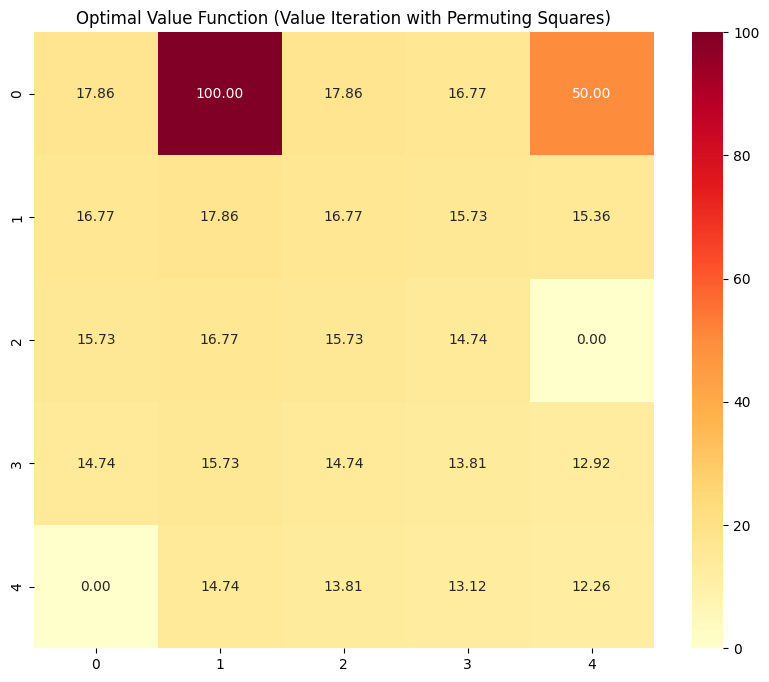

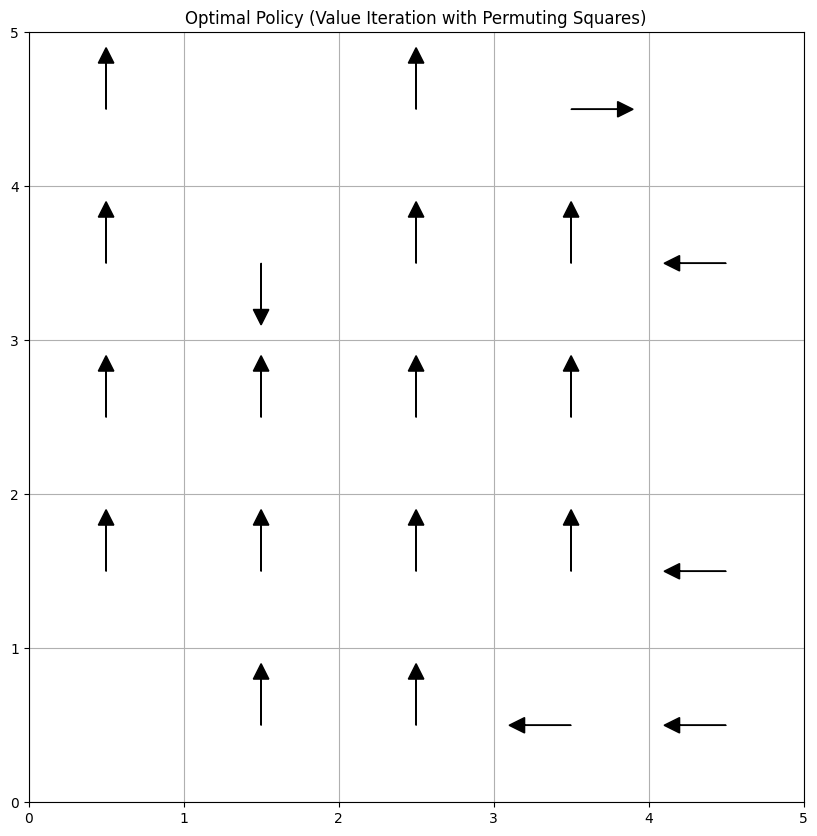


Highest value states (Value Iteration with Permuting Squares):
State: (0, 1), Value: 100.00
State: (0, 4), Value: 50.00
State: (0, 0), Value: 17.86
State: (0, 2), Value: 17.86
State: (1, 1), Value: 17.86


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grid setup (unchanged)
GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
BLUE_SQUARE = (0, 1)
GREEN_SQUARE = (0, 4)
RED_SQUARE = (4, 2)
YELLOW_SQUARE = (4, 4)
BLACK_SQUARE_1 = (2, 4)
BLACK_SQUARE_2 = (4, 0)

REWARDS = {
    BLUE_SQUARE: 5,
    GREEN_SQUARE: 2.5,
    RED_SQUARE: 0,
    YELLOW_SQUARE: 0,
    BLACK_SQUARE_1: 0,
    BLACK_SQUARE_2: 0
}

# Helper functions (unchanged)
def state_to_index(state):
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    return (index // GRID_SIZE, index % GRID_SIZE)

def get_next_state(state, action, permute_prob=0.1):
    global BLUE_SQUARE, GREEN_SQUARE

    # Permute blue and green squares with probability 0.1
    if np.random.random() < permute_prob:
        BLUE_SQUARE, GREEN_SQUARE = GREEN_SQUARE, BLUE_SQUARE

    if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
        return state, REWARDS[state]

    next_state = list(state)
    if action == 'up':
        next_state[0] = max(0, next_state[0] - 1)
    elif action == 'down':
        next_state[0] = min(GRID_SIZE - 1, next_state[0] + 1)
    elif action == 'left':
        next_state[1] = max(0, next_state[1] - 1)
    elif action == 'right':
        next_state[1] = min(GRID_SIZE - 1, next_state[1] + 1)

    next_state = tuple(next_state)

    if state == next_state:
        reward = -0.5
    elif next_state == BLUE_SQUARE:
        reward = 5
        next_state = RED_SQUARE
    elif next_state == GREEN_SQUARE:
        reward = 2.5
        next_state = RED_SQUARE if np.random.random() < 0.5 else YELLOW_SQUARE
    elif next_state in REWARDS:
        reward = REWARDS[next_state]
    else:
        reward = -0.2

    return next_state, reward

# Value Iteration
def value_iteration(gamma=0.95, theta=1e-3, max_iterations=1000):
    num_states = GRID_SIZE * GRID_SIZE
    num_actions = len(ACTIONS)

    V = np.zeros(num_states)

    for _ in range(max_iterations):
        delta = 0
        for s in range(num_states):
            v = V[s]
            state = index_to_state(s)
            action_values = []
            for action in ACTIONS:
                next_state, reward = get_next_state(state, action)
                action_values.append(reward + gamma * V[state_to_index(next_state)])
            V[s] = max(action_values)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    # Extract policy from value function
    policy = np.zeros((num_states, num_actions))
    for s in range(num_states):
        state = index_to_state(s)
        action_values = []
        for action in ACTIONS:
            next_state, reward = get_next_state(state, action)
            action_values.append(reward + gamma * V[state_to_index(next_state)])
        best_action = np.argmax(action_values)
        policy[s] = np.eye(num_actions)[best_action]

    return V, policy

# Visualization functions (unchanged)
def plot_value_function(V, title):
    V_grid = V.reshape((GRID_SIZE, GRID_SIZE))
    plt.figure(figsize=(10, 8))
    sns.heatmap(V_grid, annot=True, fmt='.2f', cmap='YlOrRd', cbar=True)
    plt.title(title)
    plt.show()

def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            state = (i, j)
            if state in [BLUE_SQUARE, GREEN_SQUARE, BLACK_SQUARE_1, BLACK_SQUARE_2]:
                continue
            action_probs = policy[state_to_index(state)]
            best_action = ACTIONS[np.argmax(action_probs)]
            if best_action == 'up':
                dx, dy = 0, 0.3
            elif best_action == 'down':
                dx, dy = 0, -0.3
            elif best_action == 'left':
                dx, dy = -0.3, 0
            else:  # right
                dx, dy = 0.3, 0
            ax.arrow(j + 0.5, GRID_SIZE - i - 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

    plt.grid(True)
    plt.show()

def print_highest_value_states(V, method_name):
    indices = np.argsort(V)[::-1][:5]
    print(f"\nHighest value states ({method_name}):")
    for i in indices:
        state = index_to_state(i)
        print(f"State: {state}, Value: {V[i]:.2f}")

# Run value iteration
print("Running Value Iteration for the new environment...")
V, policy = value_iteration()

# Visualize results
plot_value_function(V, "Optimal Value Function (Value Iteration with Permuting Squares)")
plot_policy(policy, "Optimal Policy (Value Iteration with Permuting Squares)")
print_highest_value_states(V, "Value Iteration with Permuting Squares")

## Results and Discussion for part 2 question 3

### Highest Value States
After implementing value iteration for the environment where the blue and green squares can permute with a probability of 0.1, we obtained the following highest value states:

State: (0, 1), Value: 100.00

State: (0, 4), Value: 50.00

State: (0, 0), Value: 17.86

State: (0, 2), Value: 17.86

State: (1, 1), Value: 17.86

### Analysis of Results
These results reveal several interesting insights:

Consistency of high-value states: The states (0, 1) and (0, 4) remain the highest-valued states, which correspond to the initial positions of the blue and green squares, respectively. This suggests that despite the permutation probability, these locations maintain their significance.
Magnified values: The values for the top two states (100 and 50) are significantly higher than their immediate rewards (5 and 2.5). This inflation likely reflects the long-term value of these states considering the possibility of repeated visits due to permutations.
Proximity value: States (0, 0), (0, 2), and (1, 1) all have the same value (17.86), indicating the importance of being adjacent to high-value states. This suggests that the optimal policy prioritizes staying close to potential high-reward locations.
Top row preference: Four out of five highest-value states are in the top row of the grid. This indicates a strong preference for the agent to stay in the upper part of the environment, likely to maximize chances of reaching either the blue or green square.

### Interpreting the Policy
Examining the optimal policy visualization:

Upper-left corner strategy: In the top-left quadrant of the grid, the policy consistently directs the agent towards the upper-left corner. This suggests a strategy of positioning the agent where it can quickly reach either the blue or green square, regardless of their permuted positions.

Adaptive behavior: The policy shows different directional preferences in different parts of the grid. This adaptivity is crucial in an environment where high-reward states can change positions.

Avoidance of lower-right: The policy generally avoids moving towards the lower-right corner of the grid, likely because this area is furthest from the potential positions of the blue and green squares.

Circular patterns: In some areas, particularly the central and right portions of the grid, the policy forms circular patterns. This could represent a "patrol" strategy, keeping the agent mobile to adapt to potential square permutations.

### Comparison with Static Environment
Comparing this policy to one where squares remain static reveals several key differences:

Increased state values: The permuting environment leads to significantly higher state values, reflecting the increased long-term potential of each state.

More dynamic policy: The policy in the permuting environment is more complex and less deterministic, adapting to the possibility of changing high-reward locations.

Emphasis on flexibility: Instead of directly pathing to known reward locations, the policy prioritizes positions that offer quick access to multiple potential reward sites.

Risk management: The policy seems to balance exploration (staying mobile) with exploitation (staying near known high-value positions), a crucial aspect in a changing environment.

### Implications and Conclusions
The results demonstrate that introducing uncertainty in the form of permuting reward locations significantly alters the optimal policy and value function. The agent learns to adopt a more flexible, adaptive strategy that prioritizes:

Positioning for quick reactions to changes
Staying close to potential high-reward areas
Balancing exploration and exploitation

This scenario highlights the importance of developing robust policies in dynamic environments. It also underscores the power of reinforcement learning algorithms to adapt to complex, changing conditions, producing sophisticated behaviors that balance immediate rewards with long-term strategic positioning.

Future work could explore how different permutation probabilities affect the optimal policy, or how the agent's behavior might change if it could observe or predict the permutations. This could provide further insights into adaptive decision-making in uncertain environments.

------------------------------------------------------------------------------
====================================================================================